In [1]:
# Cellule 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path

In [2]:
# Cellule : Chemins des fichiers
raw_path = Path('../data/raw/')
producer_file = raw_path / 'producer-prices_ben.csv'
consumer_file = raw_path / 'consumer-price-indices_ben.csv'  # ou qc_ si c'est le même
exchange_file = raw_path / 'exchange-rates_ben.csv'
deflator_file = raw_path / 'deflators_ben.csv'

In [ ]:
# Cellule : Charger producer-prices (focus maïs)
df_producer = pd.read_csv(producer_file)
print(df_producer.head())  # Aperçu colonnes
print(df_producer.columns)  # Vérifie noms : 'Iso3', 'StartDate', 'Item', 'Value', etc.
print(df_producer.shape)


            Iso3    StartDate     EndDate  Area Code Area Code (M49)  \
0  #country+code  #date+start   #date+end        NaN             NaN   
1            BEN   2009-01-01  2009-12-31       53.0            '204   
2            BEN   2010-01-01  2010-12-31       53.0            '204   
3            BEN   2011-01-01  2011-12-31       53.0            '204   
4            BEN   2016-01-01  2016-12-31       53.0            '204   
5            BEN   2016-01-01  2016-01-31       53.0            '204   
6            BEN   2016-02-01  2016-02-29       53.0            '204   
7            BEN   2016-03-01  2016-03-31       53.0            '204   
8            BEN   2016-04-01  2016-04-30       53.0            '204   
9            BEN   2016-05-01  2016-05-31       53.0            '204   

            Area        Item Code Item Code (CPC)             Item  \
0  #country+name  #indicator+code             NaN  #indicator+name   
1          Benin              176          '01701       Beans, dry 

In [6]:
print(df_producer["Item"].unique())

['#indicator+name' 'Beans, dry' 'Cassava, fresh' 'Coconuts, in shell'
 'Maize (corn)' 'Millet' 'Okra' 'Oranges' 'Other vegetables, fresh n.e.c.'
 'Pineapples' 'Plantains' 'Potatoes' 'Raw milk of cattle'
 'Raw milk of goats' 'Rice' 'Seed cotton, unginned' 'Sorghum'
 'Sweet potatoes' 'Taro' 'Tomatoes' 'Yams' 'Agriculture'
 'Cereals, primary' 'Coarse Grain, Total' 'Fibre Crops Primary'
 'Livestock' 'Milk, Total' 'Oilcrops, Oil Equivalent' 'Pulses, Total'
 'Roots and Tubers, Total' 'Vegetables and Melons, Total'
 'Vegetables Primary']


In [20]:
# Filtrer sur maïs (Item == 'Maize' ou Item Code == 56)
df_maize_producer = df_producer[
    (df_producer['Item'].str.contains('Maize', case=False, na=False)) &
    (df_producer['Element'] == 'Producer Price (LCU/tonne)')  # Prix en LCU/tonne
].copy()
print(df_maize_producer.head())

    Iso3   StartDate     EndDate  Area Code Area Code (M49)   Area Item Code  \
301  BEN  1991-01-01  1991-12-31       53.0            '204  Benin        56   
302  BEN  1992-01-01  1992-12-31       53.0            '204  Benin        56   
303  BEN  1993-01-01  1993-12-31       53.0            '204  Benin        56   
304  BEN  1994-01-01  1994-12-31       53.0            '204  Benin        56   
305  BEN  1995-01-01  1995-12-31       53.0            '204  Benin        56   

    Item Code (CPC)          Item  Element Code                     Element  \
301           '0112  Maize (corn)        5530.0  Producer Price (LCU/tonne)   
302           '0112  Maize (corn)        5530.0  Producer Price (LCU/tonne)   
303           '0112  Maize (corn)        5530.0  Producer Price (LCU/tonne)   
304           '0112  Maize (corn)        5530.0  Producer Price (LCU/tonne)   
305           '0112  Maize (corn)        5530.0  Producer Price (LCU/tonne)   

     Year Code  Year  Months Code        Mon

In [23]:
# Convertir dates (StartDate en datetime, focus sur mensuel/annuel)
df_maize_producer['StartDate'] = pd.to_datetime(df_maize_producer['StartDate'])
df_maize_producer = df_maize_producer.sort_values('StartDate')
df_maize_producer['Value'] = pd.to_numeric(df_maize_producer['Value'], errors='coerce')  # Prix en num


# Aperçu maïs
print(df_maize_producer[['StartDate', 'Months', 'Value', 'Unit']].head(20))  # Vois les premières lignes
print(df_maize_producer['Value'].describe())  # Stats basiques

     StartDate        Months     Value Unit
301 1991-01-01  Annual value   58000.0  LCU
302 1992-01-01  Annual value   62000.0  LCU
303 1993-01-01  Annual value   53000.0  LCU
304 1994-01-01  Annual value   52000.0  LCU
305 1995-01-01  Annual value   90000.0  LCU
306 1996-01-01  Annual value  133000.0  LCU
307 2009-01-01  Annual value  179000.0  LCU
308 2010-01-01  Annual value  124000.0  LCU
309 2011-01-01  Annual value  148000.0  LCU
310 2011-01-01       January  129000.0  LCU
311 2011-02-01      February  132000.0  LCU
312 2011-03-01         March  140000.0  LCU
313 2011-04-01         April  167000.0  LCU
314 2011-05-01           May  183000.0  LCU
315 2011-06-01          June  168000.0  LCU
316 2011-07-01          July  162000.0  LCU
317 2011-08-01        August  175000.0  LCU
318 2011-09-01     September  128000.0  LCU
319 2011-10-01       October  123000.0  LCU
320 2011-11-01      November  127000.0  LCU
count       115.000000
mean     174556.592174
std       47500.544517
min    

In [24]:
import plotly.express as px

fig = px.line(df_maize_producer, 
              x='StartDate', 
              y='Value', 
              color='Months',               # couleur par mois pour voir saisonnalité
              hover_data=['Year', 'Months'],
              title='Prix producteur maïs Bénin - Toutes données (FCFA/tonne)')
fig.show()

In [25]:
df_annual = df_maize_producer[df_maize_producer['Months'] == 'Annual value']
df_monthly = df_maize_producer[df_maize_producer['Months'] != 'Annual value']

print("Annuel :", len(df_annual), "lignes")
print(df_annual[['Year', 'Value']].sort_values('Year'))

print("\nMensuel :", len(df_monthly), "lignes")
print(df_monthly[['StartDate', 'Months', 'Value']].head(12))  # ex. une année

Annuel : 18 lignes
     Year     Value
301  1991   58000.0
302  1992   62000.0
303  1993   53000.0
304  1994   52000.0
305  1995   90000.0
306  1996  133000.0
307  2009  179000.0
308  2010  124000.0
309  2011  148000.0
323  2016  159583.3
336  2017  161302.8
337  2018  136090.2
350  2019  140196.2
351  2020  166221.5
364  2021  212727.6
377  2022  200988.6
390  2023  180424.7
403  2024  247080.3

Mensuel : 97 lignes
     StartDate     Months     Value
310 2011-01-01    January  129000.0
311 2011-02-01   February  132000.0
312 2011-03-01      March  140000.0
313 2011-04-01      April  167000.0
314 2011-05-01        May  183000.0
315 2011-06-01       June  168000.0
316 2011-07-01       July  162000.0
317 2011-08-01     August  175000.0
318 2011-09-01  September  128000.0
319 2011-10-01    October  123000.0
320 2011-11-01   November  127000.0
321 2011-12-01   December  147000.0


In [26]:
# On garde tout (comme tu préfères beaucoup de données)
df_prophet = df_maize_producer[['StartDate', 'Value']].copy()
df_prophet = df_prophet.rename(columns={'StartDate': 'ds', 'Value': 'y'})
df_prophet = df_prophet.sort_values('ds').dropna()

print(df_prophet.head(15))

            ds         y
301 1991-01-01   58000.0
302 1992-01-01   62000.0
303 1993-01-01   53000.0
304 1994-01-01   52000.0
305 1995-01-01   90000.0
306 1996-01-01  133000.0
307 2009-01-01  179000.0
308 2010-01-01  124000.0
309 2011-01-01  148000.0
310 2011-01-01  129000.0
311 2011-02-01  132000.0
312 2011-03-01  140000.0
313 2011-04-01  167000.0
314 2011-05-01  183000.0
315 2011-06-01  168000.0


In [27]:
# On garde seulement les lignes mensuelles (exclut "Annual value")
df_monthly = df_maize_producer[df_maize_producer['Months'] != 'Annual value'].copy()

# Vérification rapide
print("Nombre de lignes mensuelles pour le maïs :", len(df_monthly))
print("Années couvertes :", sorted(df_monthly['Year'].unique()))
print("\nAperçu des 15 premières lignes mensuelles :")
print(df_monthly[['StartDate', 'Year', 'Months', 'Value']].head(15).to_string(index=False))

# Stats sur les prix mensuels
print("\nStats prix mensuels :")
print(df_monthly['Value'].describe())

# Graphique mensuel (très important pour voir la saisonnalité)
import plotly.express as px

fig_monthly = px.line(df_monthly, 
                      x='StartDate', 
                      y='Value', 
                      color='Year',               # couleur par année pour comparer saisons
                      title='Prix producteur mensuel du maïs au Bénin (FCFA/tonne)')
fig_monthly.update_traces(line=dict(width=2))
fig_monthly.show()

Nombre de lignes mensuelles pour le maïs : 97
Années couvertes : ['2011', '2012', '2016', '2018', '2020', '2021', '2022', '2023', '2024']

Aperçu des 15 premières lignes mensuelles :
 StartDate Year    Months    Value
2011-01-01 2011   January 129000.0
2011-02-01 2011  February 132000.0
2011-03-01 2011     March 140000.0
2011-04-01 2011     April 167000.0
2011-05-01 2011       May 183000.0
2011-06-01 2011      June 168000.0
2011-07-01 2011      July 162000.0
2011-08-01 2011    August 175000.0
2011-09-01 2011 September 128000.0
2011-10-01 2011   October 123000.0
2011-11-01 2011  November 127000.0
2011-12-01 2011  December 147000.0
2012-01-01 2012   January 152000.0
2016-01-01 2016   January 156818.0
2016-02-01 2016  February 158182.0

Stats prix mensuels :
count        97.000000
mean     181138.071134
std       42601.476918
min      108142.000000
25%      153957.200000
50%      175000.000000
75%      198518.000000
max      315247.500000
Name: Value, dtype: float64


In [28]:
# Préparation finale pour Prophet (uniquement mensuel)
df_prophet_monthly = df_monthly[['StartDate', 'Value']].copy()
df_prophet_monthly = df_prophet_monthly.rename(columns={'StartDate': 'ds', 'Value': 'y'})
df_prophet_monthly = df_prophet_monthly.sort_values('ds').dropna()

print("\nDataFrame prête pour Prophet (mensuel) - Premières lignes :")
print(df_prophet_monthly.head(15))

print("\nDernières lignes (pour voir jusqu'où vont les données) :")
print(df_prophet_monthly.tail(10))


DataFrame prête pour Prophet (mensuel) - Premières lignes :
            ds         y
310 2011-01-01  129000.0
311 2011-02-01  132000.0
312 2011-03-01  140000.0
313 2011-04-01  167000.0
314 2011-05-01  183000.0
315 2011-06-01  168000.0
316 2011-07-01  162000.0
317 2011-08-01  175000.0
318 2011-09-01  128000.0
319 2011-10-01  123000.0
320 2011-11-01  127000.0
321 2011-12-01  147000.0
322 2012-01-01  152000.0
324 2016-01-01  156818.0
325 2016-02-01  158182.0

Dernières lignes (pour voir jusqu'où vont les données) :
            ds         y
406 2024-03-01  289387.5
407 2024-04-01  315247.5
408 2024-05-01  307022.5
409 2024-06-01  289283.3
410 2024-07-01  279641.7
411 2024-08-01  246078.3
412 2024-09-01  218104.5
413 2024-10-01  184237.9
414 2024-11-01  176638.3
415 2024-12-01  195166.7


18:20:22 - cmdstanpy - INFO - Chain [1] start processing
18:20:26 - cmdstanpy - INFO - Chain [1] done processing



Prévisions pour les 12 prochains mois :
        ds          yhat    yhat_lower    yhat_upper
2026-01-01 239250.420926 209556.231437 269832.113821
2026-02-01 247954.417274 215153.715866 279659.888935
2026-03-01 257215.171224 224238.669763 289297.178875
2026-04-01 268109.843865 235925.274061 296887.728692
2026-05-01 282663.146399 253562.477842 315507.341126
2026-06-01 271221.959668 240068.091504 304708.609528
2026-07-01 259843.083006 228825.720077 292324.680479
2026-08-01 253378.849056 220846.071972 286884.337331
2026-09-01 230987.142342 198790.708449 262391.153707
2026-10-01 228895.038558 198672.624611 260867.891426
2026-11-01 201422.673858 170157.203638 231407.001290
2026-12-01 217206.097025 183415.078512 248309.384763


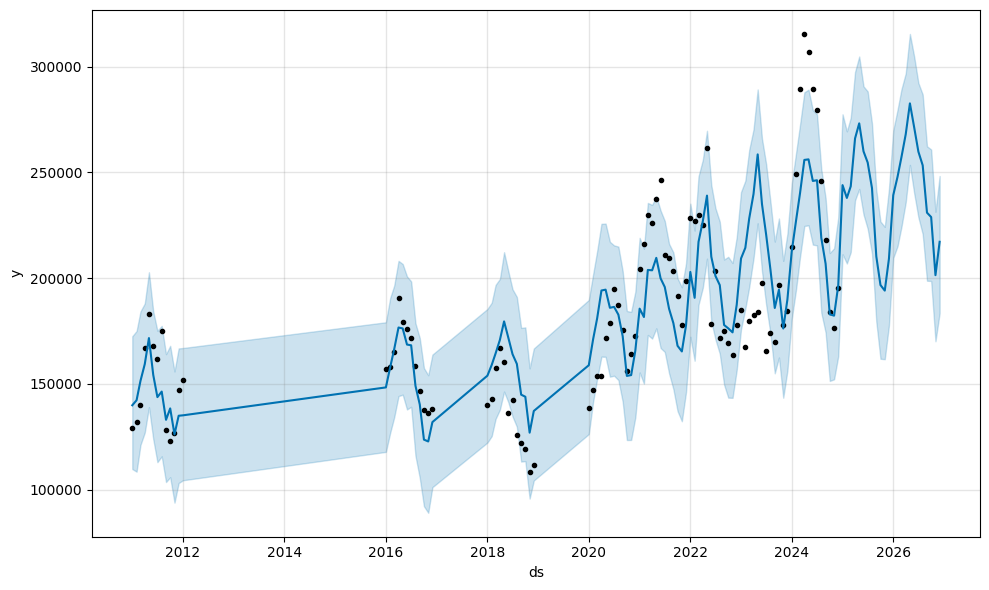

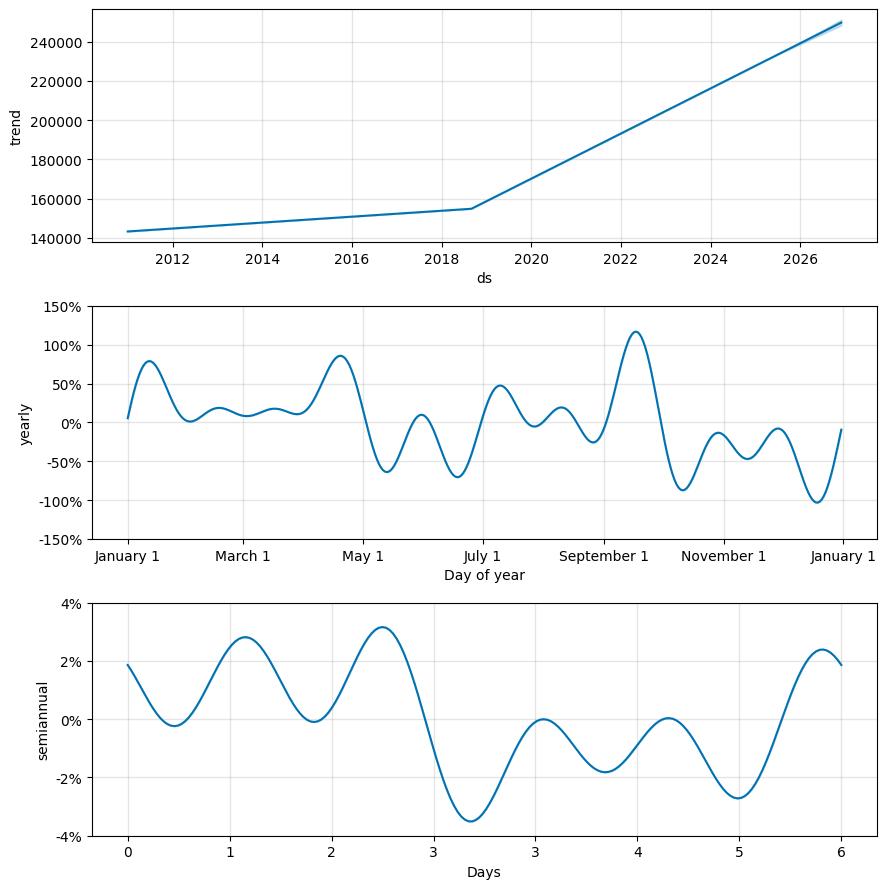

In [29]:
from prophet import Prophet

# Modèle adapté aux données mensuelles
m = Prophet(
    yearly_seasonality=True,           # saison annuelle
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='multiplicative', # pour variations en %
    changepoint_prior_scale=0.05       # ajuste si trop de changements brusques
)

# Ajout d'une saisonnalité semestrielle (utile pour agriculture : 2 saisons/an)
m.add_seasonality(name='semiannual', period=6, fourier_order=5)

# Fit
m.fit(df_prophet_monthly)

# Prévisions : 24 mois (2 ans)
future = m.make_future_dataframe(periods=24, freq='MS')  # MS = début de mois

forecast = m.predict(future)

# Affichage
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)  # décompose : trend + saisonnalité + holidays

# Tableau des prévisions futures (derniers 12 mois)
print("\nPrévisions pour les 12 prochains mois :")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12).to_string(index=False))

In [30]:
from prophet.plot import plot_plotly

fig = plot_plotly(m, forecast)
fig.update_layout(
    title="Prévisions mensuelles du prix du maïs au Bénin (FCFA/tonne)",
    xaxis_title="Date",
    yaxis_title="Prix (FCFA/tonne)",
    hovermode="x unified"
)
fig.show()

In [31]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Prédictions in-sample
forecast_in = forecast[forecast['ds'].isin(df_prophet_monthly['ds'])]
y_true = df_prophet_monthly.set_index('ds').loc[forecast_in['ds'], 'y']
y_pred = forecast_in['yhat']

mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred) * 100

print(f"MAE (erreur absolue moyenne) : {mae:,.0f} FCFA/tonne")
print(f"MAPE (erreur relative moyenne) : {mape:.1f}%")

MAE (erreur absolue moyenne) : 19,201 FCFA/tonne
MAPE (erreur relative moyenne) : 10.6%


In [32]:
import plotly.graph_objects as go

fig_error = go.Figure()
fig_error.add_trace(go.Scatter(x=df_prophet_monthly['ds'], y=df_prophet_monthly['y'],
                               mode='lines+markers', name='Prix réel', line=dict(color='black')))
fig_error.add_trace(go.Scatter(x=forecast_in['ds'], y=forecast_in['yhat'],
                               mode='lines', name='Prévision', line=dict(color='blue')))
fig_error.add_trace(go.Scatter(x=forecast_in['ds'], y=forecast_in['yhat'] - df_prophet_monthly['y'],
                               mode='lines', name='Erreur (yhat - y)', line=dict(color='red', dash='dot')))
fig_error.update_layout(title='Erreur de prévision (résidus)', yaxis_title='FCFA/tonne')
fig_error.show()